In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import folium
from folium.plugins import MarkerCluster


In [2]:
# Load the CSV file
df = pd.read_csv('bear_attacks.csv')
# Display the first few rows of the DataFrame
print(df.head())


                Date                    Location  \
0    August 23, 2018       Lyon Inlet, Nunavut     
1       July 3, 2018      Sentry Island, Nunavut   
2       July 9, 1999  near Rankin Inlet, Nunavut   
3   December 8, 1990           Point Lay, Alaska   
4  November 29, 1983         Churchill, Manitoba   

                                             Details   Bear   Latitude  \
0  Three men from Naujaat, whose boat had broken ...  Polar  66.534160   
1  A polar bear approached a man and his children...  Polar  61.167230   
2  Amitnak was mauled after trying to distract a ...  Polar  62.808913   
3  While Stalker was walking with his girlfriend,...  Polar  69.742800   
4  Mutanen was attacked and dragged on a street i...  Polar  58.767755   

    Longitude            Name  Age   Gender  
0  -83.882170   Darryl Kaunak   33     male  
1  -93.850150   Aaron Gibbons   31     male  
2  -92.087741  Hattie Amitnak   64   female  
3 -163.011250    Carl Stalker   28     male  
4  -94.16399

In [3]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       156 non-null    object 
 1   Location   156 non-null    object 
 2   Details    156 non-null    object 
 3   Bear       156 non-null    object 
 4   Latitude   156 non-null    float64
 5   Longitude  156 non-null    float64
 6   Name       155 non-null    object 
 7   Age        155 non-null    object 
 8   Gender     155 non-null    object 
dtypes: float64(2), object(7)
memory usage: 11.1+ KB
None
         Latitude   Longitude
count  156.000000  156.000000
mean    51.014942 -113.889579
std      8.825507   22.993165
min     28.647838 -163.011250
25%     45.250210 -124.686183
50%     49.814079 -113.780475
75%     58.416670 -105.525439
max     69.742800  -66.825422


In [4]:
# Check for missing values
print(df.isnull().sum())


Date         0
Location     0
Details      0
Bear         0
Latitude     0
Longitude    0
Name         1
Age          1
Gender       1
dtype: int64


In [5]:
# Print the column names
print(df.columns)


Index(['Date', 'Location', 'Details', 'Bear', 'Latitude', 'Longitude', 'Name',
       'Age', 'Gender'],
      dtype='object')


In [6]:
# Highest bear attack location
# Ensure 'Location' column exists
if 'Location' in df.columns:
    # Group by 'Location' and count the number of attacks
    location_attack_counts = df.groupby('Location').size().reset_index(name='Attack_Count')

    # Sort the locations by the number of attacks in descending order
    sorted_attack_counts = location_attack_counts.sort_values(by='Attack_Count', ascending=False)

    # Display the location with the highest bear attack rate
    highest_attack_rate_location = sorted_attack_counts.iloc[0]
    print("Location with the highest bear attack rate:")
    print(highest_attack_rate_location)
else:
    print("Column 'Location' does not exist in the DataFrame")


Location with the highest bear attack rate:
Location        Glacier National Park, Montana
Attack_Count                                10
Name: 28, dtype: object


In [7]:
# Lowest bear attack area
# Load the CSV file into a DataFrame
df = pd.read_csv('bear_attacks.csv')

# Ensure 'Location' column exists
if 'Location' in df.columns:
    # Group by 'Location' and count the number of attacks
    location_attack_counts = df.groupby('Location').size().reset_index(name='Attack_Count')

    # Filter out locations with zero attacks if necessary (assuming each location in the DataFrame has at least one attack)
    # Sort the locations by the number of attacks in ascending order
    sorted_attack_counts = location_attack_counts.sort_values(by='Attack_Count', ascending=True)

    # Display the location(s) with the lowest bear attack rate
    lowest_attack_rate_location = sorted_attack_counts.iloc[0]
    print("Location with the lowest bear attack rate:")
    print(lowest_attack_rate_location)
else:
    print("Column 'Location' does not exist in the DataFrame")


Location with the lowest bear attack rate:
Location        Bridger-Teton National Forest, Wyoming
Attack_Count                                         1
Name: 8, dtype: object


In [8]:
import pandas as pd
import folium

# Load the CSV file into a DataFrame
df = pd.read_csv('bear_attacks.csv')

# Ensure 'Location', 'Latitude', and 'Longitude' columns exist
if {'Location', 'Latitude', 'Longitude'}.issubset(df.columns):
    # Group by 'Location' and count the number of attacks
    location_attack_counts = df.groupby('Location').size().reset_index(name='Attack_Count')

    # Merge the attack counts back to the original dataframe to get coordinates
    df = pd.merge(df, location_attack_counts, on='Location', how='left')

    # Find the highest and lowest attack rate locations
    highest_attack_rate_location = df.loc[df['Attack_Count'].idxmax()]
    lowest_attack_rate_location = df.loc[df['Attack_Count'].idxmin()]

    # Create a base map centered around the mean latitude and longitude
    map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
    bear_attack_map = folium.Map(location=map_center, zoom_start=5)

    # Add a marker for the highest attack rate location
    folium.Marker(
        location=[highest_attack_rate_location['Latitude'], highest_attack_rate_location['Longitude']],
        popup=f"Highest Attack Rate\nLocation: {highest_attack_rate_location['Location']}\nAttacks: {highest_attack_rate_location['Attack_Count']}",
        icon=folium.Icon(color='red')
    ).add_to(bear_attack_map)

    # Add a marker for the lowest attack rate location
    folium.Marker(
        location=[lowest_attack_rate_location['Latitude'], lowest_attack_rate_location['Longitude']],
        popup=f"Lowest Attack Rate\nLocation: {lowest_attack_rate_location['Location']}\nAttacks: {lowest_attack_rate_location['Attack_Count']}",
        icon=folium.Icon(color='green')
    ).add_to(bear_attack_map)

    # Save the map to an HTML file
    bear_attack_map.save('bear_attack_map.html')
    print("Map has been created and saved as 'bear_attack_map.html'.")
else:
    print("Required columns 'Location', 'Latitude', or 'Longitude' do not exist in the DataFrame")


Map has been created and saved as 'bear_attack_map.html'.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Location      156 non-null    object        
 2   Details       156 non-null    object        
 3   Bear          156 non-null    object        
 4   Latitude      156 non-null    float64       
 5   Longitude     156 non-null    float64       
 6   Name          156 non-null    object        
 7   Age           156 non-null    object        
 8   Gender        156 non-null    object        
 9   Attack_Count  156 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 12.3+ KB
None
                                Date    Latitude   Longitude  Attack_Count
count                            143  156.000000  156.000000    156.000000
mean   1982-10-30 09:54:07.552447552   51.014942 -113.8895

/var/folders/lx/4rt8gjpx3tndjbrqc3j96cr80000gp/T/ipykernel_42187/1110604821.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bear_counts.index, y=bear_counts.values, palette='deep')


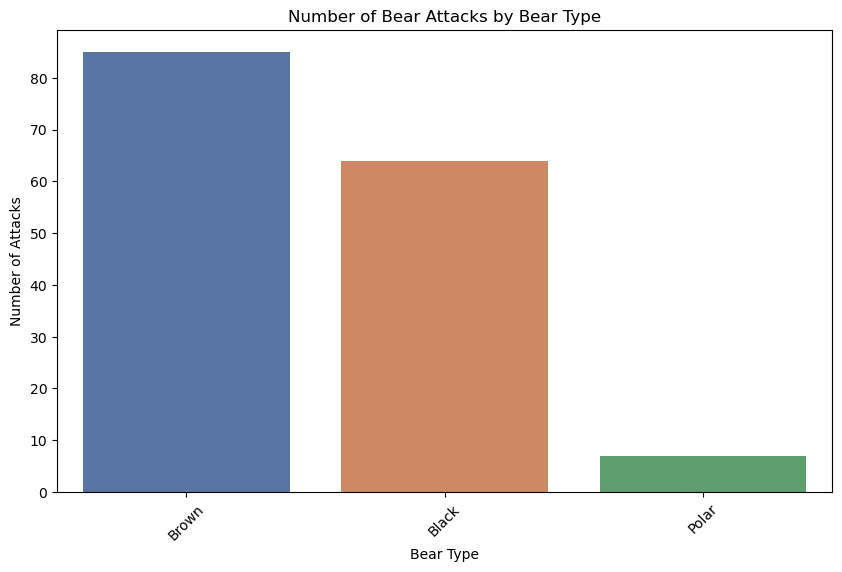

The bear type with the highest attack rate is 'Brown' with 85 attacks.


In [9]:
# Convert Date column to DateTime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing values
df = df.fillna({'Name': 'Unknown', 'Age': 'Unknown', 'Gender': 'Unknown'})

# Display DataFrame information
print(df.info())

# Display basic statistics
print(df.describe())

# Count the occurrences of each type of bear
bear_counts = df['Bear'].value_counts()

# Display the bear counts
print(bear_counts)

# Plot the frequency of bear attacks by bear type
plt.figure(figsize=(10, 6))
sns.barplot(x=bear_counts.index, y=bear_counts.values, palette='deep')
plt.title('Number of Bear Attacks by Bear Type')
plt.xlabel('Bear Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

# Identify the bear type with the highest attack rate
most_common_bear = bear_counts.idxmax()
most_common_bear_count = bear_counts.max()

print(f"The bear type with the highest attack rate is '{most_common_bear}' with {most_common_bear_count} attacks.")


In [10]:
# Load the CSV file
df = pd.read_csv('bear_attacks.csv')

# Convert Date column to DateTime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing values
df = df.fillna({'Name': 'Unknown', 'Age': 'Unknown', 'Gender': 'Unknown'})

# Create a base map
m = folium.Map(location=[51.0, -114.0], zoom_start=4)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Define a color dictionary for bear types
color_dict = {
    'Grizzly Bear': 'red',
    'Black Bear': 'blue',
    'Polar Bear': 'green',
    'Unknown Bear Type': 'gray'
}

# Add markers to the map
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(
            f"Date: {row['Date']}<br>"
            f"Location: {row['Location']}<br>"
            f"Bear: {row['Bear']}<br>"
            f"Details: {row['Details']}<br>"
            f"Name: {row['Name']}<br>"
            f"Age: {row['Age']}<br>"
            f"Gender: {row['Gender']}"
        ),
        icon=folium.Icon(color=color_dict.get(row['Bear'], 'black'))
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('bear_attacks_map.html')

print("Map has been saved to bear_attacks_map.html")


Map has been saved to bear_attacks_map.html


/var/folders/lx/4rt8gjpx3tndjbrqc3j96cr80000gp/T/ipykernel_42187/2552513501.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bear_counts.index, y=bear_counts.values, ax=ax[1], palette='deep')


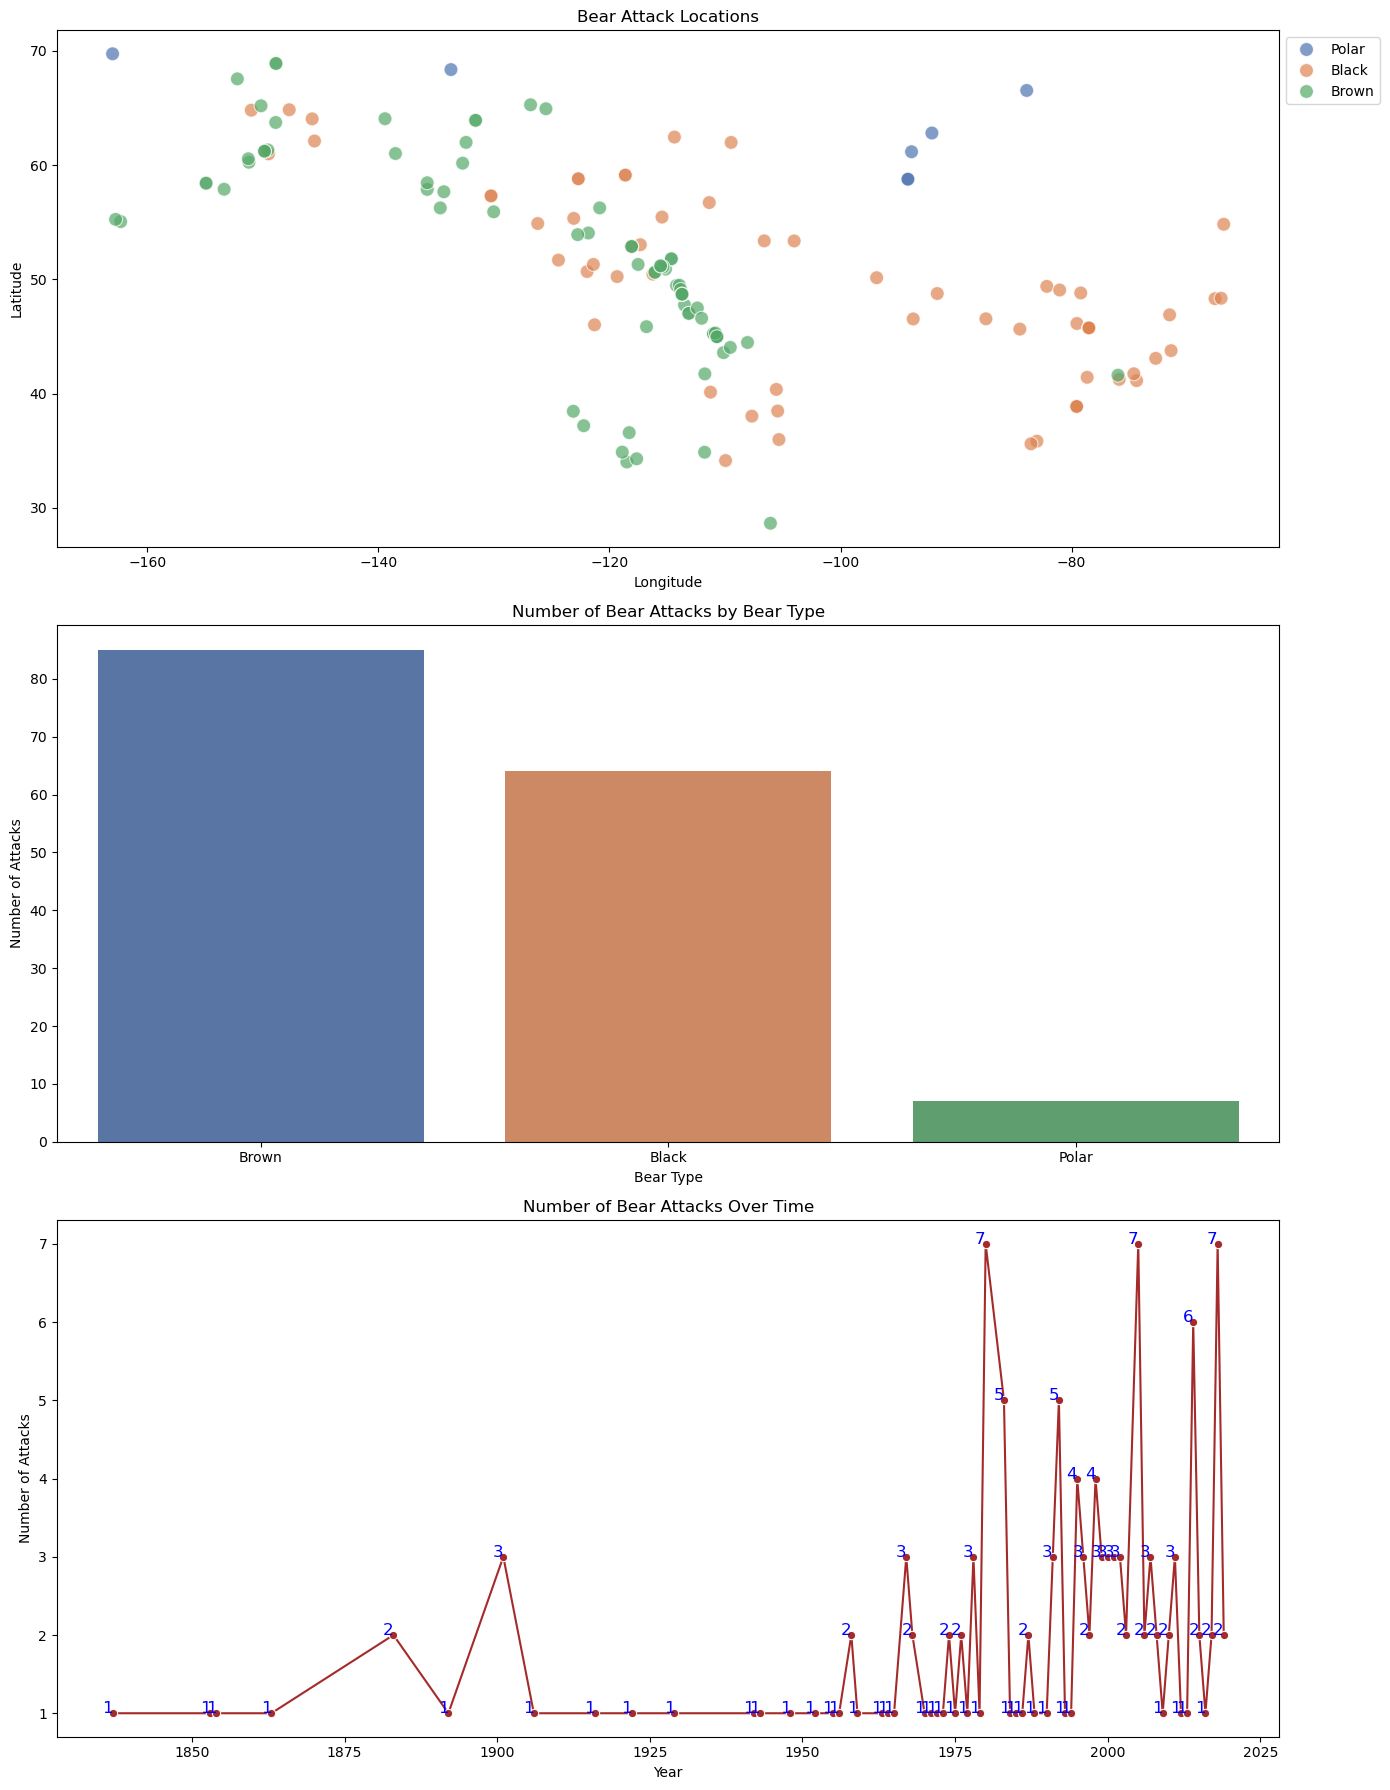

In [11]:
# Load the CSV file
df = pd.read_csv('bear_attacks.csv')

# Convert Date column to DateTime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing values
df = df.fillna({'Name': 'Unknown', 'Age': 'Unknown', 'Gender': 'Unknown'})

# Create a Year column for time-series analysis
df['Year'] = df['Date'].dt.year

# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(14, 18))

# Scatter plot of latitude and longitude
sns.scatterplot(x='Longitude', y='Latitude', hue='Bear', data=df, ax=ax[0], palette='deep', s=100, edgecolor='w', alpha=0.7)
ax[0].set_title('Bear Attack Locations')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Bar plot of bear attack counts by bear type
bear_counts = df['Bear'].value_counts()
sns.barplot(x=bear_counts.index, y=bear_counts.values, ax=ax[1], palette='deep')
ax[1].set_title('Number of Bear Attacks by Bear Type')
ax[1].set_xlabel('Bear Type')
ax[1].set_ylabel('Number of Attacks')

# Line plot showing the number of attacks over time
attacks_per_year = df['Year'].value_counts().sort_index()
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, ax=ax[2], marker='o', linestyle='-', color='brown')
ax[2].set_title('Number of Bear Attacks Over Time')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Number of Attacks')

# Add some annotations to make it look better
for i, value in enumerate(attacks_per_year.values):
    ax[2].text(attacks_per_year.index[i], value, str(value), fontsize=12, color='blue', ha='right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [12]:
# Load the CSV file
df = pd.read_csv('bear_attacks.csv')

# Convert Date column to DateTime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing values
df = df.fillna({'Name': 'Unknown', 'Age': 'Unknown', 'Gender': 'Unknown'})

# Create a base map
m = folium.Map(location=[51.0, -114.0], zoom_start=4)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Define a color dictionary for bear types
color_dict = {
    'Grizzly Bear': 'red',
    'Black Bear': 'blue',
    'Polar Bear': 'green',
    'Unknown Bear Type': 'gray'
}

# Add markers to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=(
            f"Date: {row['Date']}<br>"
            f"Location: {row['Location']}<br>"
            f"Bear: {row['Bear']}<br>"
            f"Details: {row['Details']}<br>"
            f"Name: {row['Name']}<br>"
            f"Age: {row['Age']}<br>"
            f"Gender: {row['Gender']}"
        ),
        color=color_dict.get(row['Bear'], 'black'),
        fill=True,
        fill_color=color_dict.get(row['Bear'], 'black')
    ).add_to(marker_cluster)

# Display the map
m.save('bear_attacks_map.html')
m


In [13]:
# Convert Date column to DateTime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing values
df = df.fillna({'Name': 'Unknown', 'Age': 'Unknown', 'Gender': 'Unknown'})

# Create a base map with OpenStreetMap tiles
m = folium.Map(location=[51.0, -114.0], zoom_start=4, tiles='OpenStreetMap')

# Create a marker cluster to group nearby markers
marker_cluster = MarkerCluster().add_to(m)

# Define a color dictionary for different bear types
color_dict = {
    'Grizzly Bear': 'red',
    'Black Bear': 'blue',
    'Polar Bear': 'green',
    'Unknown Bear Type': 'gray'
}

# Add markers to the map
for idx, row in df.iterrows():
    # Define the color for the current bear type
    bear_type = row['Bear'] if row['Bear'] in color_dict else 'Unknown Bear Type'
    color = color_dict[bear_type]
    
    # Create a popup with detailed information in a table
    popup_text = f'''
    <table style="width:300px;">
        <tr><th>Date:</th><td>{row['Date']}</td></tr>
        <tr><th>Location:</th><td>{row['Location']}</td></tr>
        <tr><th>Bear:</th><td>{row['Bear']}</td></tr>
        <tr><th>Details:</th><td>{row['Details']}</td></tr>
        <tr><th>Name:</th><td>{row['Name']}</td></tr>
        <tr><th>Age:</th><td>{row['Age']}</td></tr>
        <tr><th>Gender:</th><td>{row['Gender']}</td></tr>
    </table>
    '''
    
    # Add a circle marker to the map
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=folium.Popup(popup_text, max_width=300),
        color=color,
        fill=True,
        fill_color=color
    ).add_to(marker_cluster)

# Save the map to an HTML file and display it
m.save('final_bear_attacks_map.html')
m


In [3]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the data
df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3/combined_attacks_data.csv')

# Convert date column to DateTime with a specified format if known
# If the date format is known, e.g., 'YYYY-MM-DD', specify it:
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Remove rows with NaNs in 'latitude' or 'longitude' columns
df = df.dropna(subset=['latitude', 'longitude'])

# Create a base map with OpenStreetMap tiles
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4, tiles='OpenStreetMap')

# Prepare heatmap data
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]

# Add heatmap layer
HeatMap(heat_data, name="Heatmap").add_to(m)

# Display the map in the notebook
from IPython.display import display
display(m)

# Save the map
m.save('attack_map.html')


/var/folders/lx/4rt8gjpx3tndjbrqc3j96cr80000gp/T/ipykernel_45748/1862919547.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [4]:
import pandas as pd
import folium
 
# Load the data
df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3/combined_attacks_data.csv')
 
# Print the first few rows and column names to verify the data
print(df.head())
print("\nColumn names:")
print(df.columns)
 
# Check for missing or incorrect column names
required_columns = ['date', 'latitude', 'longitude', 'species', 'bear_species']
for col in required_columns:
    if col not in df.columns:
        print(f"Error: '{col}' column is missing from the dataset")
 
# Try to convert date column to DateTime
try:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    print("\nDate conversion successful")
except Exception as e:
    print(f"\nError converting date: {str(e)}")
 
# Create a simple map
try:
    m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4)
    print("\nMap creation successful")
except Exception as e:
    print(f"\nError creating map: {str(e)}")
 
# Display basic statistics
print("\nBasic Statistics:")
print(f"Total rows: {len(df)}")
print(f"Shark attacks: {len(df[df['species'].str.contains('shark', case=False, na=False)])}")
print(f"Bear attacks: {len(df[df['bear_species'].notna()])}")
 
# Save the map
try:
    m.save('simple_map.html')
    print("\nMap saved successfully")
except Exception as e:
    print(f"\nError saving map: {str(e)}")

  case_number     date    year attack_type country     area  \
0  2019.08.27  8/27/19  2019.0    Provoked     USA  Florida   
1  2019.08.21  8/21/19  2019.0  Unprovoked     USA  Florida   
2  2019.08.20  8/20/19  2019.0  Unprovoked     USA   Hawaii   
3  2019.08.16  8/16/19  2019.0  Unprovoked     USA  Florida   
4  2019.08.11  8/11/19  2019.0  Unprovoked     USA   Hawaii   

                                          location  activity  \
0                 New Smyrna Beach, Volusia County   Surfing   
1                  Fort Lauderdale, Broward County    Wading   
2  Napoopoo Park in Kealakekua Bay, The Big Island  Swimming   
3                 New Smyrna Beach, Volusia County    Wading   
4                               Makaha Beach, Oahu   Surfing   

                 name sex  ...  case_number.2 original_order unnamed:_22  \
0        Donald Walsh   M  ...     2019.08.27         6452.0         NaN   
1  Christian Mariani    M  ...     2019.08.21         6451.0         NaN   
2       

/var/folders/lx/4rt8gjpx3tndjbrqc3j96cr80000gp/T/ipykernel_45748/1193091750.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [5]:
import pandas as pd
import folium
from folium.plugins import HeatMap, MarkerCluster

# Load the data
df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3/combined_attacks_data.csv')

# Convert date column to DateTime with a specified format if known
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Remove rows with NaNs in 'latitude' or 'longitude' columns
df = df.dropna(subset=['latitude', 'longitude'])

# Create a base map with OpenStreetMap tiles
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4, tiles='OpenStreetMap')

# Prepare heatmap data
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data, name="Heatmap").add_to(m)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each attack with detailed info in popups
for idx, row in df.iterrows():
    attack_type = 'Shark' if 'shark' in str(row['species']).lower() else 'Bear'
    popup_content = f'''
    <table style="width:300px;">
        <tr><th>Date:</th><td>{row['date'].strftime('%Y-%m-%d') if pd.notnull(row['date']) else 'N/A'}</td></tr>
        <tr><th>Location:</th><td>{row['location']}</td></tr>
        <tr><th>Type:</th><td>{attack_type}</td></tr>
        <tr><th>Activity:</th><td>{row['activity']}</td></tr>
        <tr><th>Injury:</th><td>{row['injury']}</td></tr>
        <tr><th>Species:</th><td>{row['species'] if attack_type == 'Shark' else row['bear_species']}</td></tr>
    </table>
    '''
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_content, max_width=300),
        icon=folium.Icon(color='blue' if attack_type == 'Shark' else 'red')
    ).add_to(marker_cluster)

# Display the map in the notebook
from IPython.display import display
display(m)

# Save the map
m.save('attack_map.html')


/var/folders/lx/4rt8gjpx3tndjbrqc3j96cr80000gp/T/ipykernel_45748/359816979.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [1]:
import pandas as pd
import folium
 
# Load the data
df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3/combined_attacks_data.csv')
 
# Print the first few rows and column names to verify the data
print(df.head())
print("\nColumn names:")
print(df.columns)
 
# Check for missing or incorrect column names
required_columns = ['date', 'latitude', 'longitude', 'species', 'bear_species']
for col in required_columns:
    if col not in df.columns:
        print(f"Error: '{col}' column is missing from the dataset")
 
# Try to convert date column to DateTime
try:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    print("\nDate conversion successful")
except Exception as e:
    print(f"\nError converting date: {str(e)}")
 
# Create a simple map
try:
    m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4)
    print("\nMap creation successful")
except Exception as e:
    print(f"\nError creating map: {str(e)}")
 
# Display basic statistics
print("\nBasic Statistics:")
print(f"Total rows: {len(df)}")
print(f"Shark attacks: {len(df[df['species'].str.contains('shark', case=False, na=False)])}")
print(f"Bear attacks: {len(df[df['bear_species'].notna()])}")
 
# Save the map
try:
    m.save('simple_map.html')
    print("\nMap saved successfully")
except Exception as e:
    print(f"\nError saving map: {str(e)}")

  case_number     date    year attack_type country     area  \
0  2019.08.27  8/27/19  2019.0    Provoked     USA  Florida   
1  2019.08.21  8/21/19  2019.0  Unprovoked     USA  Florida   
2  2019.08.20  8/20/19  2019.0  Unprovoked     USA   Hawaii   
3  2019.08.16  8/16/19  2019.0  Unprovoked     USA  Florida   
4  2019.08.11  8/11/19  2019.0  Unprovoked     USA   Hawaii   

                                          location  activity  \
0                 New Smyrna Beach, Volusia County   Surfing   
1                  Fort Lauderdale, Broward County    Wading   
2  Napoopoo Park in Kealakekua Bay, The Big Island  Swimming   
3                 New Smyrna Beach, Volusia County    Wading   
4                               Makaha Beach, Oahu   Surfing   

                 name sex  ...  case_number.2 original_order unnamed:_22  \
0        Donald Walsh   M  ...     2019.08.27         6452.0         NaN   
1  Christian Mariani    M  ...     2019.08.21         6451.0         NaN   
2       

/var/folders/lx/4rt8gjpx3tndjbrqc3j96cr80000gp/T/ipykernel_46085/1193091750.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [2]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
 
# Load the data
df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3/combined_attacks_data.csv')
 
# Convert date column to DateTime with a specified format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
 
# Create a map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4)
 
# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)
 
# Add markers to the cluster
for idx, row in df.iterrows():
    # Determine attack type
    if pd.notna(row['species']) and 'shark' in str(row['species']).lower():
        attack_type = 'Shark'
        color = 'blue'
    elif pd.notna(row['bear_species']):
        attack_type = 'Bear'
        color = 'red'
    else:
        attack_type = 'Unknown'
        color = 'gray'
 
    # Create popup content
    popup_content = f"""
    Date: {row['date']}<br>
    Location: {row['location']}<br>
    Type: {attack_type}<br>
    Species: {row['species'] if attack_type == 'Shark' else row['bear_species']}
    """
 
    # Add marker to cluster
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=popup_content,
        color=color,
        fill=True,
        fillColor=color
    ).add_to(marker_cluster)
 
# Display basic statistics
print("\nBasic Statistics:")
print(f"Total attacks: {len(df)}")
print(f"Shark attacks: {len(df[df['species'].str.contains('shark', case=False, na=False)])}")
print(f"Bear attacks: {len(df[df['bear_species'].notna()])}")
 
# Save the map
m.save('attack_map.html')
print("\nMap saved as 'attack_map.html'")

ValueError: Location values cannot contain NaNs.

In [3]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load the data
df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3/combined_attacks_data.csv')

# Convert date column to DateTime with a specified format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Filter out rows with NaN values in 'latitude' or 'longitude'
df = df.dropna(subset=['latitude', 'longitude'])

# Create a map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for idx, row in df.iterrows():
    # Determine attack type
    if pd.notna(row['species']) and 'shark' in str(row['species']).lower():
        attack_type = 'Shark'
        color = 'blue'
    elif pd.notna(row['bear_species']):
        attack_type = 'Bear'
        color = 'red'
    else:
        attack_type = 'Unknown'
        color = 'gray'

    # Create popup content
    popup_content = f"""
    Date: {row['date']}<br>
    Location: {row['location']}<br>
    Type: {attack_type}<br>
    Species: {row['species'] if attack_type == 'Shark' else row['bear_species']}
    """

    # Add marker to cluster
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=popup_content,
        color=color,
        fill=True,
        fillColor=color
    ).add_to(marker_cluster)

# Display basic statistics
print("\nBasic Statistics:")
print(f"Total attacks: {len(df)}")
print(f"Shark attacks: {len(df[df['species'].str.contains('shark', case=False, na=False)])}")
print(f"Bear attacks: {len(df[df['bear_species'].notna()])}")

# Display the map in the Jupyter Notebook
display(m)

# Save the map
m.save('attack_map.html')
print("\nMap saved as 'attack_map.html'")



Basic Statistics:
Total attacks: 136
Shark attacks: 0
Bear attacks: 136



Map saved as 'attack_map.html'


In [4]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load the data
df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3/combined_attacks_data.csv')

# Convert date column to DateTime with a specified format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Filter out rows with NaN values in 'latitude' or 'longitude'
df = df.dropna(subset=['latitude', 'longitude'])

# Debug: Check unique values in the 'species' column
print("Unique values in 'species' column:", df['species'].unique())

# Create a map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for idx, row in df.iterrows():
    species = str(row['species']).lower() if pd.notna(row['species']) else ''
    if 'shark' in species:
        attack_type = 'Shark'
        color = 'blue'
    elif pd.notna(row['bear_species']):
        attack_type = 'Bear'
        color = 'red'
    else:
        attack_type = 'Unknown'
        color = 'gray'

    # Create popup content
    popup_content = f"""
    Date: {row['date']}<br>
    Location: {row['location']}<br>
    Type: {attack_type}<br>
    Species: {row['species'] if attack_type == 'Shark' else row['bear_species']}
    """

    # Add marker to cluster
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=popup_content,
        color=color,
        fill=True,
        fillColor=color
    ).add_to(marker_cluster)

# Display basic statistics
print("\nBasic Statistics:")
print(f"Total attacks: {len(df)}")
print(f"Shark attacks: {len(df[df['species'].str.contains('shark', case=False, na=False)])}")
print(f"Bear attacks: {len(df[df['bear_species'].notna()])}")

# Display the map in the Jupyter Notebook
display(m)

# Save the map
m.save('attack_map.html')
print("\nMap saved as 'attack_map.html'")


Unique values in 'species' column: [nan]

Basic Statistics:
Total attacks: 136
Shark attacks: 0
Bear attacks: 136



Map saved as 'attack_map.html'


In [5]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load the data
df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3/combined_attacks_data.csv')

# Convert date column to DateTime with a specified format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Filter out rows with NaN values in 'latitude' or 'longitude'
df = df.dropna(subset=['latitude', 'longitude'])

# Create a map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for idx, row in df.iterrows():
    species = str(row['species']).lower() if pd.notna(row['species']) else ''
    
    # Check if the attack involves a shark
    if 'shark' in species:
        attack_type = 'Shark'
        color = 'blue'
    elif pd.notna(row['bear_species']):
        attack_type = 'Bear'
        color = 'red'
    else:
        attack_type = 'Unknown'
        color = 'gray'

    # Create popup content
    popup_content = f"""
    Date: {row['date']}<br>
    Location: {row['location']}<br>
    Type: {attack_type}<br>
    Species: {row['species'] if attack_type == 'Shark' else row['bear_species']}
    """

    # Add marker to cluster
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=popup_content,
        color=color,
        fill=True,
        fillColor=color
    ).add_to(marker_cluster)

# Display basic statistics
print("\nBasic Statistics:")
print(f"Total attacks: {len(df)}")
print(f"Shark attacks: {len(df[df['species'].str.contains('shark', case=False, na=False)])}")
print(f"Bear attacks: {len(df[df['bear_species'].notna()])}")

# Display the map in the Jupyter Notebook
display(m)

# Save the map
m.save('attack_map.html')
print("\nMap saved as 'attack_map.html'")



Basic Statistics:
Total attacks: 136
Shark attacks: 0
Bear attacks: 136



Map saved as 'attack_map.html'


In [2]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load the bear attack data
bear_df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3_sloppy/combined_attacks_data.csv')

# Load the shark attack data
shark_df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3_sloppy/shark_attacks_clean_data.csv')

# Convert date columns to DateTime format for consistency
bear_df['date'] = pd.to_datetime(bear_df['date'], format='%Y-%m-%d', errors='coerce')
shark_df['date'] = pd.to_datetime(shark_df['date'], format='%Y-%m-%d', errors='coerce')

# Filter out rows with NaN values in 'latitude' or 'longitude' in both datasets
bear_df = bear_df.dropna(subset=['latitude', 'longitude'])
shark_df = shark_df.dropna(subset=['latitude', 'longitude'])

# Add a new column to distinguish between bear and shark attacks
bear_df['attack_type'] = 'Bear'
shark_df['attack_type'] = 'Shark'

# Combine the datasets
combined_df = pd.concat([bear_df, shark_df], ignore_index=True)

# Create a map centered on the average latitude and longitude
m = folium.Map(location=[combined_df['latitude'].mean(), combined_df['longitude'].mean()], zoom_start=4)

# Create a MarkerCluster to hold all the markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each attack in the combined dataset
for idx, row in combined_df.iterrows():
    if row['attack_type'] == 'Shark':
        color = 'blue'
        species = row['species']  # Use the species column from shark dataset
    else:
        color = 'red'
        species = row['bear_species']  # Use the bear_species column from bear dataset
    
    popup_content = f"""
    Date: {row['date']}<br>
    Location: {row['location']}<br>
    Type: {row['attack_type']}<br>
    Species: {species}
    """

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=popup_content,
        color=color,
        fill=True,
        fillColor=color
    ).add_to(marker_cluster)

# Display basic statistics
total_attacks = len(combined_df)
shark_attacks = len(shark_df)
bear_attacks = len(bear_df)

print("\nBasic Statistics:")
print(f"Total attacks: {total_attacks}")
print(f"Shark attacks: {shark_attacks}")
print(f"Bear attacks: {bear_attacks}")

# Display the map in the Jupyter Notebook
display(m)

# Save the map
m.save('combined_attack_map.html')
print("\nMap saved as 'combined_attack_map.html'")


KeyError: ['latitude', 'longitude']

In [4]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load the bear attack data
bear_df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3_sloppy/combined_attacks_data.csv')

# Load the shark attack data
shark_df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3_sloppy/shark_attacks_clean_data.csv')

# Print shark_df columns to check the correct names for latitude and longitude
print(shark_df.columns)

# Assuming the correct columns for latitude and longitude in shark_df are 'lat' and 'lon' (adjust if needed)
shark_df = shark_df.rename(columns={'lat': 'latitude', 'lon': 'longitude'})

# Convert date columns to DateTime format for consistency
bear_df['date'] = pd.to_datetime(bear_df['date'], format='%Y-%m-%d', errors='coerce')
shark_df['date'] = pd.to_datetime(shark_df['date'], format='%Y-%m-%d', errors='coerce')

# Filter out rows with NaN values in 'latitude' or 'longitude' in both datasets
bear_df = bear_df.dropna(subset=['latitude', 'longitude'])
shark_df = shark_df.dropna(subset=['latitude', 'longitude'])

# Add a new column to distinguish between bear and shark attacks
bear_df['attack_type'] = 'Bear'
shark_df['attack_type'] = 'Shark'

# Combine the datasets
combined_df = pd.concat([bear_df, shark_df], ignore_index=True)

# Create a map centered on the average latitude and longitude
m = folium.Map(location=[combined_df['latitude'].mean(), combined_df['longitude'].mean()], zoom_start=4)

# Create a MarkerCluster to hold all the markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each attack in the combined dataset
for idx, row in combined_df.iterrows():
    if row['attack_type'] == 'Shark':
        color = 'blue'
        species = row['species']  # Use the species column from shark dataset
    else:
        color = 'red'
        species = row['bear_species']  # Use the bear_species column from bear dataset
    
    popup_content = f"""
    Date: {row['date']}<br>
    Location: {row['location']}<br>
    Type: {row['attack_type']}<br>
    Species: {species}
    """

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=popup_content,
        color=color,
        fill=True,
        fillColor=color
    ).add_to(marker_cluster)

# Display basic statistics
total_attacks = len(combined_df)
shark_attacks = len(shark_df)
bear_attacks = len(bear_df)

print("\nBasic Statistics:")
print(f"Total attacks: {total_attacks}")
print(f"Shark attacks: {shark_attacks}")
print(f"Bear attacks: {bear_attacks}")

# Display the map in the Jupyter Notebook
display(m)

# Save the map
m.save('combined_attack_map.html')
print("\nMap saved as 'combined_attack_map.html'")


Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')


KeyError: ['latitude', 'longitude']

In [6]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load the bear attack data
bear_df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3_sloppy/combined_attacks_data.csv')

# Load the shark attack data
shark_df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3_sloppy/shark_attacks_clean_data.csv')

# Assuming you add latitude and longitude columns to the shark_df
# Here we use dummy columns 'lat' and 'long', replace with correct ones if different
shark_df['latitude'] = ...  # Replace with correct latitude data
shark_df['longitude'] = ...  # Replace with correct longitude data

# Convert date columns to DateTime format for consistency
bear_df['date'] = pd.to_datetime(bear_df['date'], format='%Y-%m-%d', errors='coerce')
shark_df['date'] = pd.to_datetime(shark_df['date'], format='%Y-%m-%d', errors='coerce')

# Filter out rows with NaN values in 'latitude' or 'longitude' in both datasets
bear_df = bear_df.dropna(subset=['latitude', 'longitude'])
shark_df = shark_df.dropna(subset=['latitude', 'longitude'])

# Add a new column to distinguish between bear and shark attacks
bear_df['attack_type'] = 'Bear'
shark_df['attack_type'] = 'Shark'

# Combine the datasets
combined_df = pd.concat([bear_df, shark_df], ignore_index=True)

# Create a map centered on the average latitude and longitude
m = folium.Map(location=[combined_df['latitude'].mean(), combined_df['longitude'].mean()], zoom_start=4)

# Create a MarkerCluster to hold all the markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each attack in the combined dataset
for idx, row in combined_df.iterrows():
    if row['attack_type'] == 'Shark':
        color = 'blue'
        species = row['species']  # Use the species column from shark dataset
    else:
        color = 'red'
        species = row['bear_species']  # Use the bear_species column from bear dataset
    
    popup_content = f"""
    Date: {row['date']}<br>
    Location: {row['location']}<br>
    Type: {row['attack_type']}<br>
    Species: {species}
    """

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=popup_content,
        color=color,
        fill=True,
        fillColor=color
    ).add_to(marker_cluster)

# Display basic statistics
total_attacks = len(combined_df)
shark_attacks = len(shark_df)
bear_attacks = len(bear_df)

print("\nBasic Statistics:")
print(f"Total attacks: {total_attacks}")
print(f"Shark attacks: {shark_attacks}")
print(f"Bear attacks: {bear_attacks}")

# Display the map in the Jupyter Notebook
display(m)

# Save the map
m.save('combined_attack_map.html')
print("\nMap saved as 'combined_attack_map.html'")


TypeError: unsupported operand type(s) for +: 'float' and 'ellipsis'

In [7]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load the bear attack data
bear_df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3/combined_attacks_data.csv')

# Load the shark attack data
shark_df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3/shark_attacks_clean_data.csv')

# Replace 'lat' and 'long' with your actual latitude and longitude column names
# If you don't have them, you need to geocode or add them manually
shark_df['latitude'] = shark_df['lat']  # Replace with actual latitude column
shark_df['longitude'] = shark_df['long']  # Replace with actual longitude column

# Convert date columns to DateTime format for consistency
bear_df['date'] = pd.to_datetime(bear_df['date'], format='%Y-%m-%d', errors='coerce')
shark_df['date'] = pd.to_datetime(shark_df['date'], format='%Y-%m-%d', errors='coerce')

# Filter out rows with NaN values in 'latitude' or 'longitude' in both datasets
bear_df = bear_df.dropna(subset=['latitude', 'longitude'])
shark_df = shark_df.dropna(subset=['latitude', 'longitude'])

# Add a new column to distinguish between bear and shark attacks
bear_df['attack_type'] = 'Bear'
shark_df['attack_type'] = 'Shark'

# Combine the datasets
combined_df = pd.concat([bear_df, shark_df], ignore_index=True)

# Create a map centered on the average latitude and longitude
m = folium.Map(location=[combined_df['latitude'].mean(), combined_df['longitude'].mean()], zoom_start=4)

# Create a MarkerCluster to hold all the markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each attack in the combined dataset
for idx, row in combined_df.iterrows():
    if row['attack_type'] == 'Shark':
        color = 'blue'
        species = row['species']  # Use the species column from shark dataset
    else:
        color = 'red'
        species = row['bear_species']  # Use the bear_species column from bear dataset
    
    popup_content = f"""
    Date: {row['date']}<br>
    Location: {row['location']}<br>
    Type: {row['attack_type']}<br>
    Species: {species}
    """

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=popup_content,
        color=color,
        fill=True,
        fillColor=color
    ).add_to(marker_cluster)

# Display basic statistics
total_attacks = len(combined_df)
shark_attacks = len(shark_df)
bear_attacks = len(bear_df)

print("\nBasic Statistics:")
print(f"Total attacks: {total_attacks}")
print(f"Shark attacks: {shark_attacks}")
print(f"Bear attacks: {bear_attacks}")

# Display the map in the Jupyter Notebook
display(m)

# Save the map
m.save('combined_attack_map.html')
print("\nMap saved as 'combined_attack_map.html'")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jonathanyoung/Desktop/Project_3/combined_attacks_data.csv'

In [8]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load the bear attack data
bear_df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3_sloppy/combined_attacks_data.csv')

# Load the shark attack data
shark_df = pd.read_csv('/Users/jonathanyoung/Desktop/Project_3_sloppy/shark_attacks_clean_data.csv')

# Assuming 'lat' and 'long' are your actual latitude and longitude column names in the shark data
# Replace these with the correct column names if they are different
shark_df['latitude'] = shark_df['lat']  # Replace 'lat' with the correct latitude column
shark_df['longitude'] = shark_df['long']  # Replace 'long' with the correct longitude column

# Convert date columns to DateTime format for consistency
bear_df['date'] = pd.to_datetime(bear_df['date'], format='%Y-%m-%d', errors='coerce')
shark_df['date'] = pd.to_datetime(shark_df['date'], format='%Y-%m-%d', errors='coerce')

# Filter out rows with NaN values in 'latitude' or 'longitude' in both datasets
bear_df = bear_df.dropna(subset=['latitude', 'longitude'])
shark_df = shark_df.dropna(subset=['latitude', 'longitude'])

# Add a new column to distinguish between bear and shark attacks
bear_df['attack_type'] = 'Bear'
shark_df['attack_type'] = 'Shark'

# Combine the datasets
combined_df = pd.concat([bear_df, shark_df], ignore_index=True)

# Create a map centered on the average latitude and longitude
m = folium.Map(location=[combined_df['latitude'].mean(), combined_df['longitude'].mean()], zoom_start=4)

# Create a MarkerCluster to hold all the markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each attack in the combined dataset
for idx, row in combined_df.iterrows():
    if row['attack_type'] == 'Shark':
        color = 'blue'
        species = row['species']  # Use the species column from shark dataset
    else:
        color = 'red'
        species = row['bear_species']  # Use the bear_species column from bear dataset
    
    popup_content = f"""
    Date: {row['date']}<br>
    Location: {row['location']}<br>
    Type: {row['attack_type']}<br>
    Species: {species}
    """

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=popup_content,
        color=color,
        fill=True,
        fillColor=color
    ).add_to(marker_cluster)

# Display basic statistics
total_attacks = len(combined_df)
shark_attacks = len(shark_df)
bear_attacks = len(bear_df)

print("\nBasic Statistics:")
print(f"Total attacks: {total_attacks}")
print(f"Shark attacks: {shark_attacks}")
print(f"Bear attacks: {bear_attacks}")

# Display the map in the Jupyter Notebook
display(m)

# Save the map
m.save('/Users/jonathanyoung/Desktop/Project_3_sloppy/combined_attack_map.html')
print("\nMap saved as 'combined_attack_map.html'")


KeyError: 'lat'

In [9]:
print(shark_df.columns)


Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')
